In [ ]:
# Install and Import Dependencies
# EasyOCR (for Optical Character Recognition)
# imutils (a helper library for OpenCV).
%pip install easyocr
%pip install imutils

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2 # For image processing
from matplotlib import pyplot as plt # For displaying images
import numpy as np # For numerical operations (used in image manipulations)
import imutils # Provides additional helper functions for OpenCV
import easyocr # Used to extract text from images

In [ ]:
# image = cv2.imread("/home/abhivandhana/Documents/life/PG/cv/License-Plate-Detector-2/test/8edca6de-d964-4027-823d-f70d3f872412___12042943_1003224833031653_9073848483429898813_n-jpg_jpeg.rf.1882821d2dd595aee5b484591273cab7.jpg")  # Replace with your image path
image = cv2.imread("/home/abhivandhana/Documents/life/PG/cv/car_sir.jpeg")  # Replace with your image path
height, width, channels = image.shape
print(f"Width: {width}px, Height: {height}px, Channels: {channels}")

Width: 1098px, Height: 953px, Channels: 3


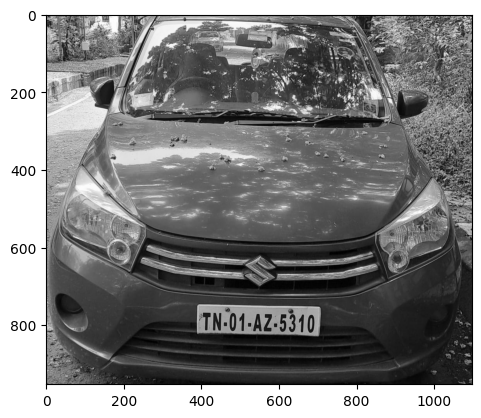

In [ ]:
# Reads the input image from the specified path using OpenCV.
# Converts the image from BGR (default OpenCV format) to grayscale for easier processing.
# Displays the grayscale image (converted to RGB format for correct colors in matplotlib).
img = cv2.imread('/home/abhivandhana/Documents/life/PG/cv/car_sir.jpeg')

# img = cv2.imread('/home/abhivandhana/Documents/life/PG/cv/License-Plate-Detector-2/test/8edca6de-d964-4027-823d-f70d3f872412___12042943_1003224833031653_9073848483429898813_n-jpg_jpeg.rf.1882821d2dd595aee5b484591273cab7.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

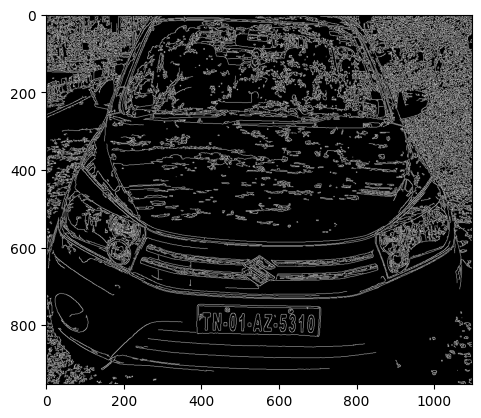

In [ ]:
#smooths images while preserving edges, unlike basic blurring methods that remove edges too.
# A larger value means more pixels will be considered for filtering.
# sigmaColor=17 → How much color/intensity variation is considered for blurring.
# Higher values allow more distant colors to mix together, leading to stronger smoothing.
# sigmaSpace=17 → How much influence nearby pixels have based on distance.
# Larger values mean farther pixels influence each other more.
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction - 11 (Diameter of pixel neighborhood), 17, 17 (Filter sigma values)
edged = cv2.Canny(bfilter, 30, 200) #Edge detection - 30 (Lower threshold), 200 (Upper threshold)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
# Finds contours in the edge-detected image.
# cv2.RETR_TREE → Retrieves all contours in a tree-like structure. - contour retrievel mode
# cv2.CHAIN_APPROX_SIMPLE → Compresses contour points to save memory.
# imutils.grab_contours() extracts the contours in a format compatible with different OpenCV versions.
#cv2.findContours(image, mode, method)
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
# Sorts contours by area (largest first) and keeps only the top 10.
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
# Loops through the top 10 contours to find the one that has four corners (assuming the license plate is rectangular).
# Uses cv2.approxPolyDP() to approximate the shape of each contour.
# cv2.approxPolyDP(curve, epsilon, closed)
# epsilon=10 → Approximation accuracy (higher values = more simplification).
# This is a percentage of the contour perimeter (epsilon = 0.01 * arcLength).
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location

array([[[389, 753]],

       [[390, 823]],

       [[704, 827]],

       [[702, 753]]], dtype=int32)

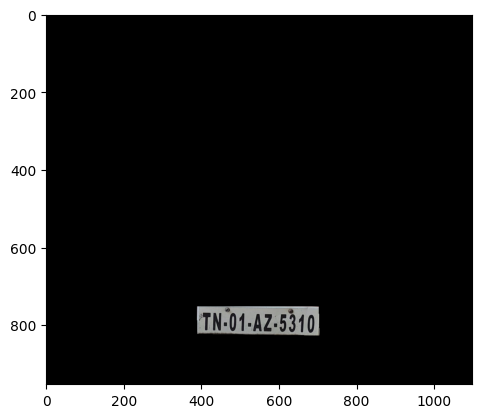

In [ ]:
# Draws the detected contour on the original image
mask = np.zeros(gray.shape, np.uint8)
# The contour is filled with white (255) color.
# The -1 parameter indicates that the contour should be filled.
# The 0 parameter indicates that the contour should be drawn on the mask.
# The mask is then used to isolate the license plate region in the original image.
# The mask is created by drawing the detected contour on a black background.
new_image = cv2.drawContours(mask, [location], 0,255, -1)
# The cv2.bitwise_and() function combines the original image and the mask.
# The result is that only the license plate region is visible in the new image.
# The mask is used to isolate the license plate region in the original image.
new_image = cv2.bitwise_and(img, img, mask=mask)
# Displays the isolated license plate region.
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
# The coordinates of the white region in the mask are found using np.where().
# The np.where() function returns the indices of the elements that are non-zero (white) in the mask.
# The mask is a binary image where the license plate region is white (255) and the rest is black (0).
(x,y) = np.where(mask==255)
# The coordinates of the bounding box are found using np.min() and np.max().
# The bounding box is defined by the minimum and maximum x and y coordinates of the white region.
# The cropped image is obtained by slicing the grayscale image using the bounding box coordinates.
# The cropped image is the region of interest (ROI) containing the license plate.
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2, y1:y2]

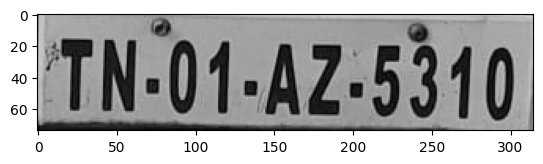

In [ ]:
# Displays the cropped image (license plate region).
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
# Initialize EasyOCR Reader
# The EasyOCR Reader is initialized with the language 'en' (English).
# The reader is used to perform OCR on the cropped image.
# The cropped image is passed to the reader to extract text.
# The reader reads the text from the cropped image.
# The result contains the detected text and its bounding box coordinates.
# The result is a list of tuples, where each tuple contains the bounding box coordinates and the detected text.
# The result is then displayed.
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[np.int32(5), np.int32(5)],
   [315, np.int32(5)],
   [315, 74],
   [np.int32(5), 74]],
  'Tn:01.Az.5310',
  np.float64(0.3100525389916232))]

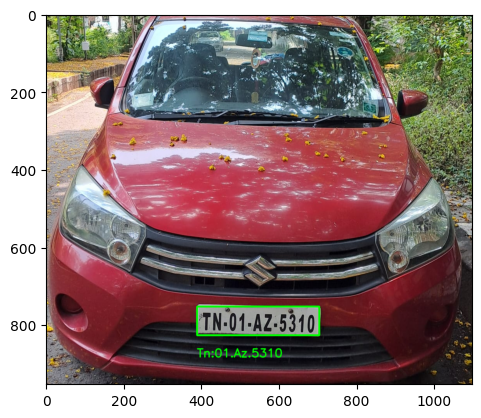

In [ ]:
# The result is a list of tuples, where each tuple contains the bounding box coordinates and the detected text.
# The bounding box coordinates are used to draw a rectangle around the detected text.
# The detected text is extracted from the result.
# The text is then displayed on the original image.
# The text is extracted from the result.
# The text is drawn on the original image using cv2.putText().
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))